In [1]:
from collections import Counter
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, random
import pandas as pd
from collections import defaultdict
warnings.filterwarnings("ignore")

### Utils

In [2]:
def plot_histogram_from_dict(label_counts: dict) -> None:
    # Convert the label counts to a pandas DataFrame
    label_counts_df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['count'])
    label_counts_df = label_counts_df.sort_values(by='count', ascending=False)

    sns.barplot(data=label_counts_df, x=label_counts_df.index, y='count')
    plt.xticks(rotation=45)
    plt.show()

In [3]:
def plot_pie_from_dict(label_counts: dict) -> None:
    # Create the pie chart
    fig, ax = plt.subplots(figsize=(12, 12))
    colors = sns.color_palette("tab10", len(label_counts))
    wedges, texts, autotexts = ax.pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%', colors=colors, textprops={'fontsize': 14})

    # Create a legend for the labels and colors
    legend_labels = [f"{label} ({count})" for label, count in label_counts.items()]
    legend = ax.legend(wedges, legend_labels, title="Label", loc="center left", bbox_to_anchor=(1, 0.5))

    # Set the title and adjust the layout
    ax.set_title('Label Distribution', fontsize=14)
    plt.tight_layout()

    # Adjust the legend positioning to avoid crossing
    plt.subplots_adjust(right=0.7)

    plt.show()

# Analysis

In [4]:
# Extract tags
TAGS_URL = "../data/labels.csv"
df = pd.read_csv(TAGS_URL)
df.head(5)

,image,labels
0,800113bb65efe69e.jpg,healthy
1,8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
2,80070f7fb5e2ccaa.jpg,scab
3,80077517781fb94f.jpg,scab
4,800cbf0ff87721f8.jpg,complex


In [5]:
# split the values in the labels column by space
split_labels = df.labels.str.split()
# count the frequency of each label
label_counts = Counter(label for labels in split_labels for label in labels)
print(label_counts)

Counter({'scab': 5712, 'healthy': 4624, 'frog_eye_leaf_spot': 4352, 'complex': 2151, 'rust': 2077, 'powdery_mildew': 1271})


In [6]:
# check for missing values
print("Number of null samples in labels column:", df["labels"].isnull().sum())
print("Number of null samples in image column:", df["image"].isnull().sum())

Number of null samples in labels column: 0
Number of null samples in image column: 0


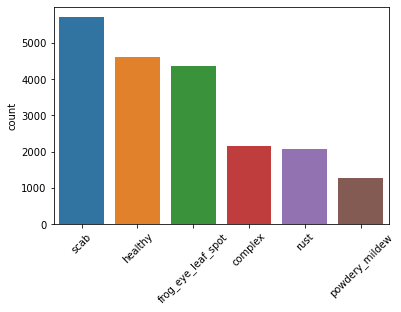

In [7]:
# label counts
plot_histogram_from_dict(label_counts)

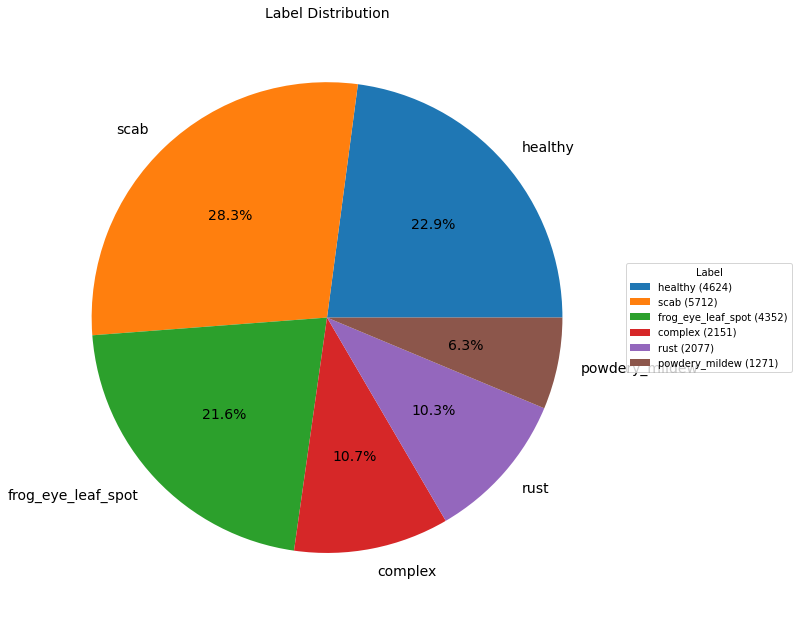

In [8]:
# label distribution
plot_pie_from_dict(label_counts)

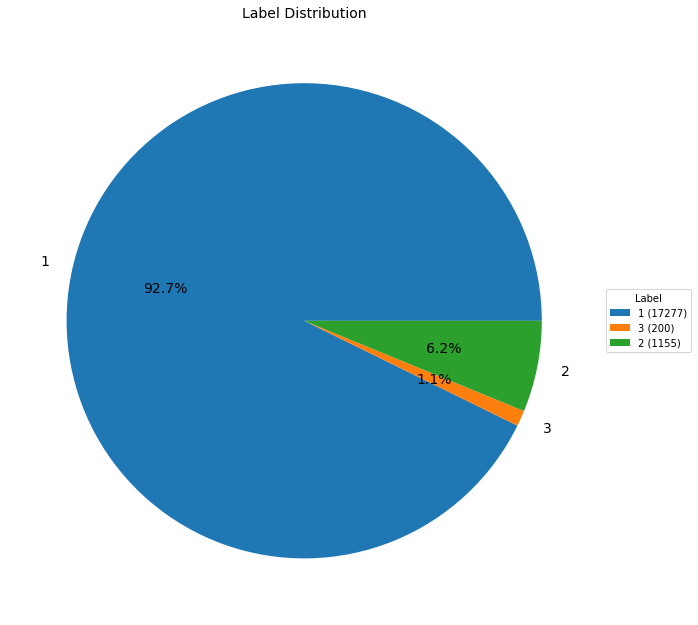

In [9]:
# the counts of labels per image

num_label_counts = defaultdict(int)
for labels in df["labels"]:
    image_labels = labels.split()
    num_label_counts[len(image_labels)] += 1

plot_pie_from_dict(num_label_counts)

### Which targets are correlated?

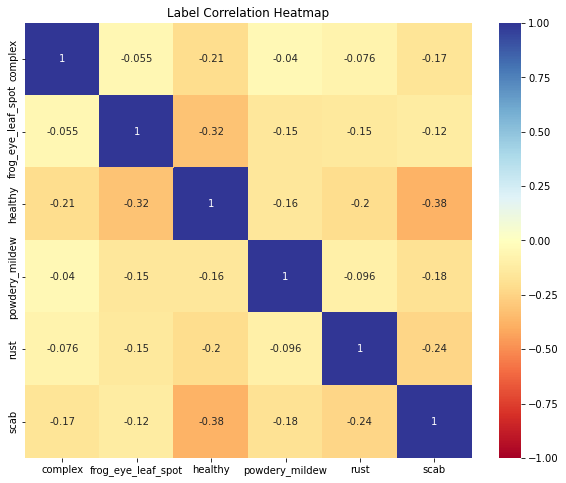

In [10]:
# Convert labels column into a format suitable for correlation analysis
label_list = df['labels'].apply(lambda x: x.split())
label_matrix = pd.get_dummies(label_list.apply(pd.Series).stack()).sum(level=0)

# Calculate the correlation matrix
correlation_matrix = label_matrix.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="RdYlBu", vmin=-1, vmax=1, annot=True)
plt.title('Label Correlation Heatmap')
plt.show()
